## 畫直方圖

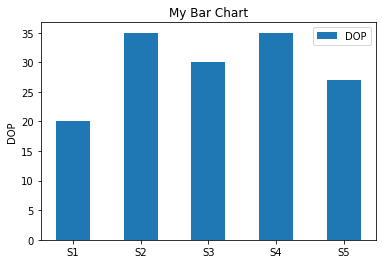

In [11]:
import matplotlib.pyplot as plt


labels = ['S03', 'S35', 'S3', 'S4', 'S5']
gps_dop = [20, 86, 30, 35, 27]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, gps_dop, width, label='DOP')

ax.set_ylabel('DOP')
ax.set_title('My Bar Chart')
ax.legend()

plt.show()

## 讀取GPS資料

In [54]:
import matplotlib.pyplot as plt

def update_bar_chart(labels, values):
  fig, ax = plt.subplots()
  ax.bar(labels, values)
  plt.show()

In [17]:
def checkSum(msg):
    try:
        data = msg[msg.index('$')+1:msg.index('*')]
        cs = 0
        for c in data:
            cs = cs ^ ord(c)
        return cs == int(msg[msg.index('*')+1:], 16)
    except:
        return False

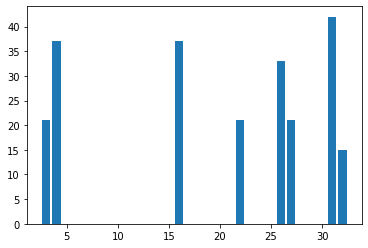

In [70]:
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from IPython.display import clear_output

logs = None
with open('gps_log.txt', 'r') as f:
    logs = f.readlines()

gsvs = filter(lambda msg: 'GPGSV' in msg, logs)
sats = np.empty(0)
snrs = np.empty(0)
for gsv in gsvs:
    if checkSum(gsv):
        gsv = gsv[:gsv.index('*')]  # remove check sum
        fields = gsv.split(',')
        # print(fields)
        m_n = int(fields[1])
        m_inx = int(fields[2])
        sat_n = int(fields[3])
        infos = np.reshape(list(map(lambda v: int(v) if v != '' else 0, fields[4:])), (-1, 4))
        sats = np.append(sats, infos[:, 0])
        snrs = np.append(snrs, infos[:, 3])
        # if len(infos)>3:
        #     print(fields[4:], infos)
        #     print(sats, snrs)
        if m_inx == m_n:
            update_bar_chart(sats, snrs)
            sats = np.empty(0)
            snrs = np.empty(0)
            sleep(0.1)
            clear_output(wait=True)
